### Importting libraries

In [118]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

### Loading breast cancer dataset from sklearn

In [119]:
dataset_BC = load_breast_cancer()
dfbc = pd.DataFrame(dataset_BC.data, columns=dataset_BC.feature_names)
dfbc['target'] = dataset_BC.target
dfbc

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### Getting breast cancer data information

In [120]:
print(dfbc.target.info())
print("\n\n\n",dfbc["target"].value_counts())

<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: target
Non-Null Count  Dtype
--------------  -----
569 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB
None



 target
1    357
0    212
Name: count, dtype: int64


In [121]:
dfbc.target.describe()


,target
count,569.000000
mean,0.627417
std,0.483918
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


### Loading play tennis dataset from drive

In [122]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [123]:
dfpt = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dm/play_tennis_dataset.csv",index_col=0)
dfpt.index.name = None
dfpt

,Outlook,Temperature,Humidity,Wind,Play
D1,Overcast,Mild,Normal,Strong,Yes
D2,Sunny,Mild,Normal,Strong,Yes
D3,NaN,Mild,High,Strong,No
D4,Sunny,Mild,High,Weak,Yes
D5,Sunny,Cool,Normal,Strong,Yes
...,...,...,...,...,...
D28,Sunny,Mild,High,Weak,Yes
D29,Rainy,Cool,High,Weak,No
D30,Overcast,Cool,High,Weak,Yes
D31,Sunny,Hot,High,Strong,No


### Getting play tennis data information

In [124]:
print(dfpt.Play.info())
print("\n\n\n",dfpt["Play"].value_counts())

<class 'pandas.core.series.Series'>
Index: 6666 entries, D1 to D1
Series name: Play
Non-Null Count  Dtype 
--------------  ----- 
6666 non-null   object
dtypes: object(1)
memory usage: 362.2+ KB
None



 Play
Yes    4080
No     2586
Name: count, dtype: int64


In [125]:
dfpt.Play.describe()

,Play
count,6666
unique,2
top,Yes
freq,4080


### Normalizing breast cancer data

In [126]:
scaler = StandardScaler()
dfbc_stand = pd.DataFrame(scaler.fit_transform(dfbc),columns=dfbc.columns,index=dfbc.index)
dfbc_stand["target"] = dfbc["target"].values
dfbc_stand

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,0
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,0
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,0
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,0


### Encoding and Standardizing play tennis data

In [127]:
feature_cols = dfpt.columns[:-1]
dfpt_enco = pd.DataFrame({})
for col in feature_cols:
  dfpt_enco[col] = dfpt[col].astype("category").cat.codes
dfpt_enco

,Outlook,Temperature,Humidity,Wind
D1,0,2,1,0
D2,2,2,1,0
D3,-1,2,0,0
D4,2,2,0,1
D5,2,0,1,0
...,...,...,...,...
D28,2,2,0,1
D29,1,0,0,1
D30,0,0,0,1
D31,2,1,0,0


In [128]:
dfpt_stand = pd.DataFrame(scaler.fit_transform(dfpt_enco),columns=dfpt_enco.columns)
dfpt_stand["Play"] = dfpt["Play"].values
dfpt_stand

,Outlook,Temperature,Humidity,Wind,Play
0,-0.933421,1.215531,0.805509,-1.046923,Yes
1,1.208467,1.215531,0.805509,-1.046923,Yes
2,-2.004366,1.215531,-0.968367,-1.046923,No
3,1.208467,1.215531,-0.968367,0.652320,Yes
4,1.208467,-0.902553,0.805509,-1.046923,Yes
...,...,...,...,...,...
6661,1.208467,1.215531,-0.968367,0.652320,Yes
6662,0.137523,-0.902553,-0.968367,0.652320,No
6663,-0.933421,-0.902553,-0.968367,0.652320,Yes
6664,1.208467,0.156489,-0.968367,-1.046923,No


In [129]:
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [130]:

bc_target = dfbc['target'] # This has original values (0 or 1)

# Create a scaler specifically for breast cancer features
scaler_bc_features = StandardScaler()
# Scale only the feature columns of dfbc, then convert to DataFrame
bc_features = pd.DataFrame(scaler_bc_features.fit_transform(dfbc_stand.drop('target', axis=1)),
                           columns=dfbc_stand.columns.drop('target'),
                           index=dfbc_stand.index)

# For Play Tennis data (these were already handled correctly for their types)
pt_features = dfpt_stand[dfpt_stand.columns[:-1]]
pt_target = dfpt_stand[dfpt_stand.columns[-1]]

In [131]:
kf = KFold(shuffle=True,random_state=10)

bc_scores = {
    "accuracy":[],
    "precision":[],
    "recall":[],
    "f1":[]
}
pt_scores = {
    "accuracy":[],
    "precision":[],
    "recall":[],
    "f1":[]
}
for train_index, test_index in kf.split(bc_features):
  bcX_train, bcX_test = bc_features.iloc[train_index], bc_features.iloc[test_index]
  bcy_train, bcy_test = bc_target.iloc[train_index], bc_target.iloc[test_index]

  model_bc = GaussianNB()
  model_bc.fit(bcX_train,bcy_train)
  bc_preds = model_bc.predict(bcX_test)
  bc_scores["accuracy"].append(accuracy_score(bcy_test,bc_preds))
  bc_scores["precision"].append(precision_score(bcy_test, bc_preds, average='binary', pos_label=1)) # Original target 1
  bc_scores["recall"].append(recall_score(bcy_test, bc_preds, average='binary', pos_label=1))
  bc_scores["f1"].append(f1_score(bcy_test, bc_preds, average='binary', pos_label=1))


for train_index, test_index in kf.split(pt_features):

  ptX_train, ptX_test = pt_features.iloc[train_index], pt_features.iloc[test_index]
  pty_train, pty_test = pt_target.iloc[train_index], pt_target.iloc[test_index]

  model_pt = GaussianNB()
  model_pt.fit(ptX_train,pty_train)
  pt_preds = model_pt.predict(ptX_test)
  pt_scores["accuracy"].append(accuracy_score(pty_test,pt_preds))
  pt_scores["precision"].append(precision_score(pty_test, pt_preds, average='binary', pos_label='Yes'))
  pt_scores["recall"].append(recall_score(pty_test, pt_preds, average='binary', pos_label='Yes'))
  pt_scores["f1"].append(f1_score(pty_test, pt_preds, average='binary', pos_label='Yes'))

In [132]:
print("Breast Cancer Scores (avg over folds):")
for metric, scores in bc_scores.items():
    print(f"  {metric}: {sum(scores) / len(scores):.4f}")

print("\nPlay Tennis Scores (avg over folds):")
for metric, scores in pt_scores.items():
    print(f"  {metric}: {sum(scores) / len(scores):.4f}")

Breast Cancer Scores (avg over folds):
  accuracy: 0.9367
  precision: 0.9408
  recall: 0.9583
  f1: 0.9488

Play Tennis Scores (avg over folds):
  accuracy: 0.6968
  precision: 0.7107
  recall: 0.8512
  f1: 0.7746


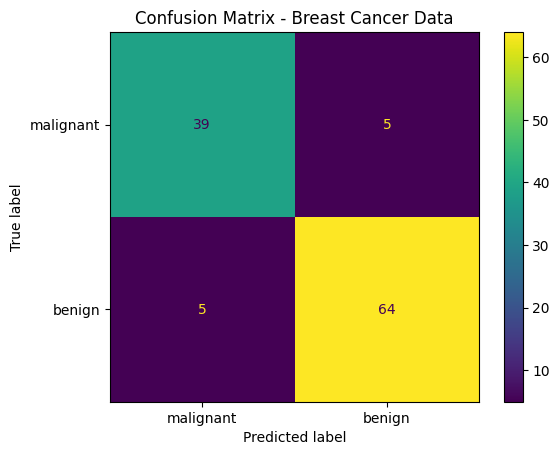

In [133]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix for Breast Cancer Data
cm_bc = confusion_matrix(bcy_test, bc_preds)
disp_bc = ConfusionMatrixDisplay(confusion_matrix=cm_bc, display_labels=dataset_BC.target_names)
disp_bc.plot()
plt.title('Confusion Matrix - Breast Cancer Data')
plt.show()

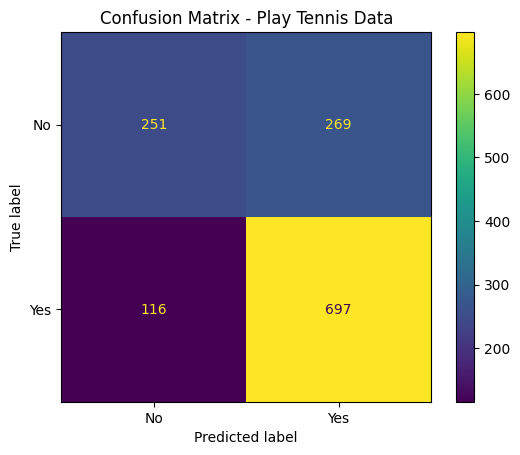

In [134]:
import matplotlib.pyplot as plt

# Confusion Matrix for Play Tennis Data
cm_pt = confusion_matrix(pty_test, pt_preds)
disp_pt = ConfusionMatrixDisplay(confusion_matrix=cm_pt, display_labels=['No', 'Yes'])
disp_pt.plot()
plt.title('Confusion Matrix - Play Tennis Data')
plt.show()